# Mann-Whitney U Test

- This test is also known as Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test and is a non-parametric hypothesis test.

<a href="https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/"> source </a>

### Appropriate data
One-way data with two groups: two-sample data, that is,
Your dependent variable is of one of the three following: 1) ordinal, 2) interval, or 3) ratio,
The independent variable is a factor with two levels (again, only two groups, see the first point),
Observations between groups are independent.  That is, not paired or repeated measures data
To be a test of medians, the distributions of values for both the groups have to be of similar shape and spread.  Under other conditions, the Mann-Whitney U test is by and large a test of stochastic equality.

### Hypotheses
As with the two samples t-test there are normally two hypothesis:

- Null hypothesis (H0): The two groups are sampled from populations with identical distributions.  Typically, the sampled populations exhibit stochastic equality.
- Alternative hypothesis (Ha: The two groups are sampled from populations with different distributions.  Most of the time, this means that one of the sampled populations (groups) displays stochastic dominance.

### Interpretation
If the results are significant they can be reported as “The values for men were significantly different from those for women.”, if you are examining differences in values between men and women.

### When do you use Mann-Whitney U Test?
You can use the Mann-Whitney U test when your outcome/dependent variable is either ordinal or continous but not normally distributed. Furthermore, this non-parametric test is used when you want to compare differences between two independent groups (e.g., such as an alternative to the two-sample t-test).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import mannwhitneyu

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)

## Load Data

In [2]:
data = {'Notrt':[7, 5, 6, 4, 12, 9, 8],
        'Trt':[3, 6, 4, 2, 1, 5, 1]}


df = pd.DataFrame(data)
df

df.Notrt.var()
df.Trt.var()

,Notrt,Trt
0,7,3
1,5,6
2,6,4
3,4,2
4,12,1
5,9,5
6,8,1


7.238095238095238

3.8095238095238098

## Use the mannwhitneyu method

In [3]:
from scipy.stats import mannwhitneyu

# Carrying out the Wilcoxon–Mann–Whitney test
results = mannwhitneyu(df['Notrt'], df['Trt'])
results

MannwhitneyuResult(statistic=44.5, pvalue=0.012326963542679745)

In [4]:
idrt = [i for i in range(1,8)]
idrt += idrt

data = {'Count':[7, 5, 6, 4, 12, 9, 8,
                3, 6, 4, 2, 1, 5, 1],
       'Condition':['No Treatment']*7 + ['Treatment']*7, 'IDtrt':idrt}

# Dictionary to Dataframe
df_1 = pd.DataFrame(data)
df_1

# Subsetting (i.e., creating new variables):
x = df_1.query('Condition == "No Treatment"')['Count'] 
y = df_1.query('Condition == "Treatment"')['Count']

# Mann-Whitney U test:
mannwhitneyu(x, y)

,Count,Condition,IDtrt
0,7,No Treatment,1
1,5,No Treatment,2
2,6,No Treatment,3
3,4,No Treatment,4
4,12,No Treatment,5
5,9,No Treatment,6
6,8,No Treatment,7
7,3,Treatment,1
8,6,Treatment,2
9,4,Treatment,3


MannwhitneyuResult(statistic=44.5, pvalue=0.012326963542679745)

- It is noteworthy the mannwhitneyu method will by default carry out a one-sided test. If we, on the other hand, would use the parameter alternative and set it to “two-sided” we would get different results.

## Mann-Whitney U Test with the Python Package Pingouin

In [5]:
from pingouin import mwu

results2 = mwu(df['Notrt'], df['Trt'], 
               alternative='greater') # default: alternative='one-sided'

results2

,U-val,alternative,p-val,RBC,CLES
MWU,44.50,greater,0.01,-0.82,0.91


We have statistically significant evidence at α =0.05 to show that the treatment groups differ in the number of depressive episodes. 

## Visualizing the Data with Boxplots

Count    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

Text(0.5, 1.0, 'Boxplot grouped by Condition')

Text(0, 0.5, 'Number of Depressive Episodes')

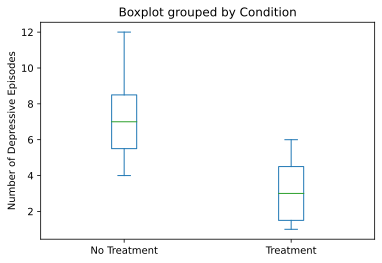

In [6]:
fig, ax=plt.subplots()
df_1.plot(kind='box', column='Count', by='Condition',
                   figsize=(8, 6), grid=False, ax=ax)
ax.set_title('Boxplot grouped by Condition')
ax.set_ylabel('Number of Depressive Episodes')